In [789]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [790]:
df = pd.read_csv('/content/US_House_price_merged_data.csv')

In [791]:
df.head(5)

,Unnamed: 0,CPI,GDP_per_Capita,housing_subsidies,median_household_income,months_supply_of_new_houses,new_one_family_houses_sold,average_mortgage,interest_rates,price,total_households,total_population,unemployment_rate
0,2000-01-01,169.3,49335.000000,19.690000,70020.000000,4.3,873,8.2100,5.45,100.552,104705.0,281083,4.0
1,2000-02-01,170.0,49593.000000,19.763583,69924.166667,4.3,856,8.3250,5.73,101.340,104997.0,281299,4.1
2,2000-03-01,171.0,49851.000000,19.837167,69828.333333,4.3,900,8.2400,5.85,102.127,105289.0,281531,4.0
3,2000-04-01,170.9,50109.000000,19.910750,69732.500000,4.4,841,8.1525,6.02,102.923,105581.0,281763,3.8
4,2000-05-01,171.2,50080.666667,19.984333,69636.666667,4.4,857,8.5150,6.27,103.678,105873.0,281996,4.0


In [792]:
df.shape

(303, 13)

In [793]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   303 non-null    object 
 1   CPI                          303 non-null    float64
 2   GDP_per_Capita               301 non-null    float64
 3   housing_subsidies            277 non-null    float64
 4   median_household_income      277 non-null    float64
 5   months_supply_of_new_houses  303 non-null    float64
 6   new_one_family_houses_sold   303 non-null    int64  
 7   average_mortgage             302 non-null    float64
 8   interest_rates               303 non-null    float64
 9   price                        303 non-null    float64
 10  total_households             289 non-null    float64
 11  total_population             303 non-null    int64  
 12  unemployment_rate            303 non-null    float64
dtypes: float64(10), int6

In [794]:
df = df.rename(columns={'Unnamed: 0': 'Date'})
df['Date'] = pd.to_datetime(df['Date'])

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         303 non-null    datetime64[ns]
 1   CPI                          303 non-null    float64       
 2   GDP_per_Capita               301 non-null    float64       
 3   housing_subsidies            277 non-null    float64       
 4   median_household_income      277 non-null    float64       
 5   months_supply_of_new_houses  303 non-null    float64       
 6   new_one_family_houses_sold   303 non-null    int64         
 7   average_mortgage             302 non-null    float64       
 8   interest_rates               303 non-null    float64       
 9   price                        303 non-null    float64       
 10  total_households             289 non-null    float64       
 11  total_population             303 non-null    

In [796]:
df.isnull().sum()

,0
Date,0
CPI,0
GDP_per_Capita,2
housing_subsidies,26
median_household_income,26
months_supply_of_new_houses,0
new_one_family_houses_sold,0
average_mortgage,1
interest_rates,0
price,0


In [797]:
df.duplicated().sum()

np.int64(0)

In [798]:
# Extrapolate Median_Income
last_12_months = df['median_household_income'].dropna().iloc[-12:]  # Last 12 non-NaN months
avg_growth_rate = (last_12_months.iloc[-1] / last_12_months.iloc[0]) ** (1/12) - 1
start_index = len(df['median_household_income'].dropna())
for i in range(start_index, len(df)):
    df.loc[df.index[i], 'median_household_income'] = df['median_household_income'].iloc[i-1] * (1 + avg_growth_rate)

In [799]:
# Extrapolate Housing Subsidies
last_12_months = df['housing_subsidies'].dropna().iloc[-12:]  # Last 12 non-NaN months
avg_growth_rate = (last_12_months.iloc[-1] / last_12_months.iloc[0]) ** (1/12) - 1
start_index = len(df['housing_subsidies'].dropna())
for i in range(start_index, len(df)):
    df.loc[df.index[i], 'housing_subsidies'] = df['housing_subsidies'].iloc[i-1] * (1 + avg_growth_rate)

In [800]:
# Extrapolate Total Households
last_12_months = df['total_households'].dropna().iloc[-12:]  # Last 12 non-NaN months
avg_growth_rate = (last_12_months.iloc[-1] / last_12_months.iloc[0]) ** (1/12) - 1
start_index = len(df['total_households'].dropna())
for i in range(start_index, len(df)):
    df.loc[df.index[i], 'total_households'] = df['total_households'].iloc[i-1] * (1 + avg_growth_rate)

In [801]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [802]:
df.isnull().sum()

,0
Date,0
CPI,0
GDP_per_Capita,0
housing_subsidies,0
median_household_income,0
months_supply_of_new_houses,0
new_one_family_houses_sold,0
average_mortgage,0
interest_rates,0
price,0


In [803]:
#Growth Rate
df['Inflation_Growth'] = df['CPI'].pct_change() * 100
df['Population_Growth'] = df['total_population'].pct_change() * 100

In [804]:
df['Inflation_Growth'].head(5)

,Inflation_Growth
0,NaN
1,0.413467
2,0.588235
3,-0.058480
4,0.175541


In [805]:
df['Population_Growth'].head(5)

,Population_Growth
0,NaN
1,0.076846
2,0.082475
3,0.082407
4,0.082694


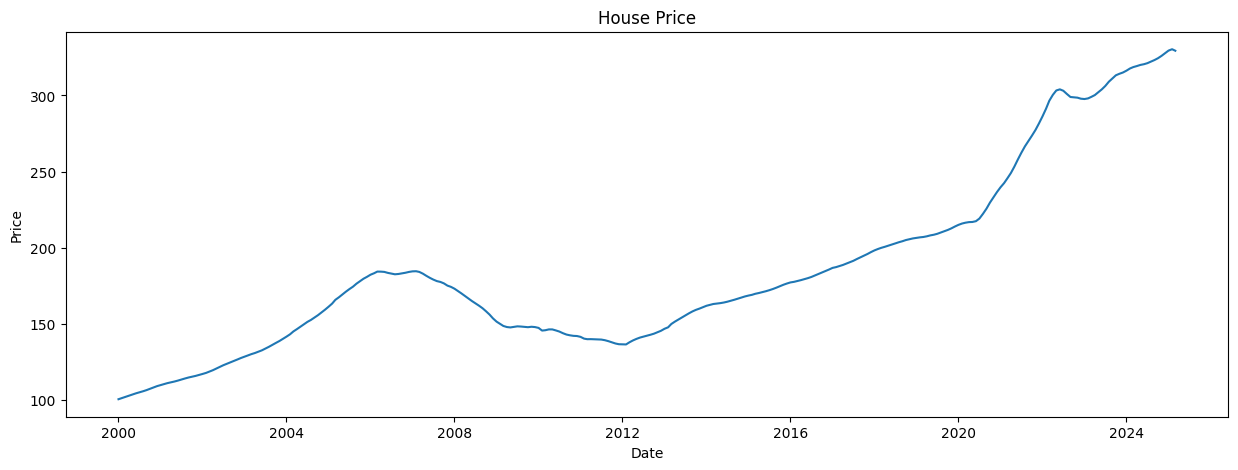

In [806]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date', y='price', data=df, palette='Set1')
plt.title('House Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

From 2000 to present we can see the increase in housing prices with a drop in period of 2008 - 2012 showing US Housing Crisis.

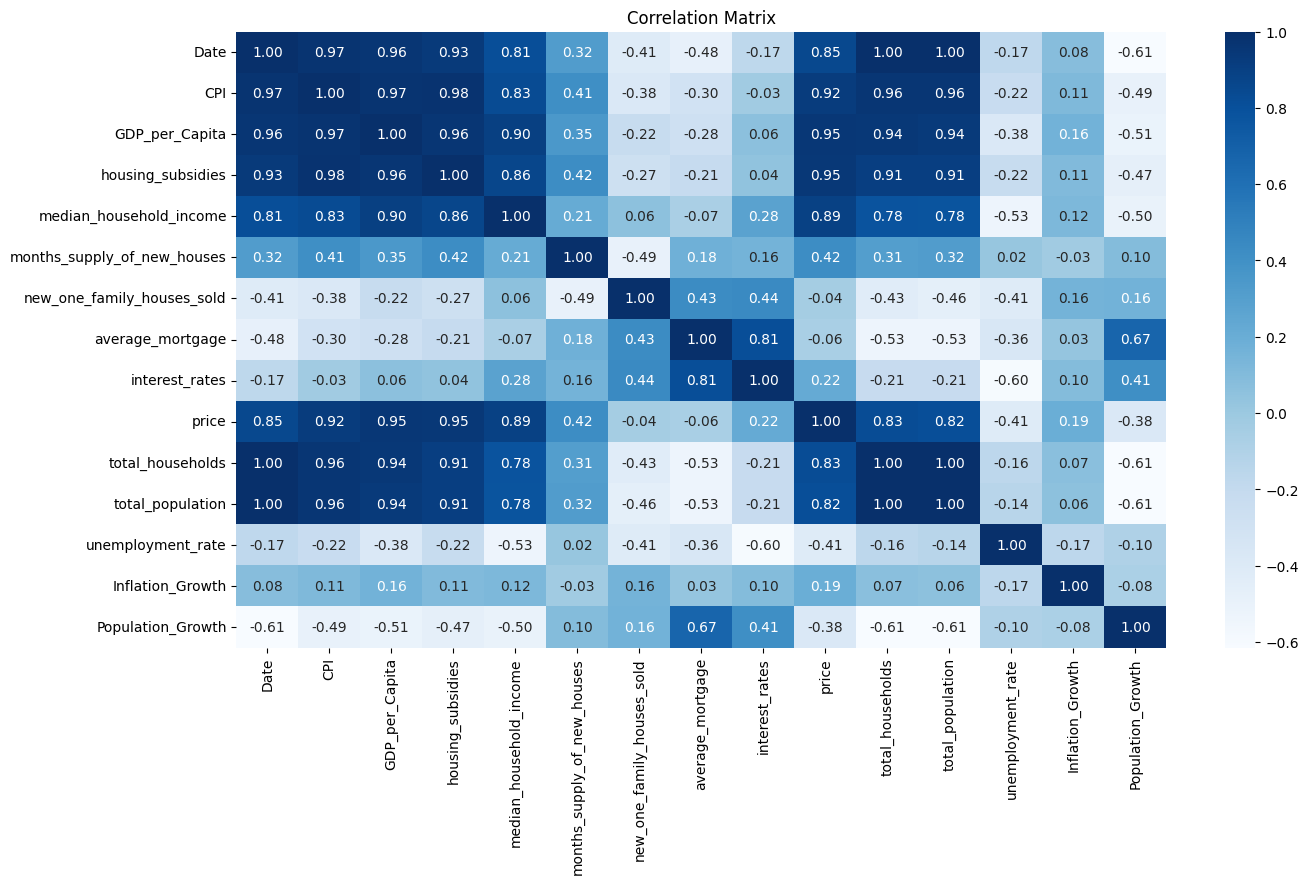

In [807]:
matrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#plt.savefig('correlation_matrix.png')

###There is multi-collinearity in the data
We can also drop Population_Growth, new_one_family_houses_sold, Inflation_Growth cause it have nearly 0 relation with Price.

In [808]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numerical columns for VIF calculation
numerical_df = df.select_dtypes(include=['number']).dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = numerical_df.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]
print(vif_data)

                        feature            VIF
0                           CPI   13469.932028
1                GDP_per_Capita   20150.811659
2             housing_subsidies    1340.773957
3       median_household_income    3923.905937
4   months_supply_of_new_houses      82.811070
5    new_one_family_houses_sold     176.960700
6              average_mortgage     134.274770
7                interest_rates      11.789816
8                         price    1426.720914
9              total_households  145087.954958
10             total_population  181949.391057
11            unemployment_rate      64.629499
12             Inflation_Growth       1.884526
13            Population_Growth      48.832120


In [809]:
df = df.drop(columns=['total_population', 'interest_rates', 'median_household_income', 'CPI', 'Population_Growth', 'Inflation_Growth', 'new_one_family_houses_sold'])

In [810]:
numerical_df = df.select_dtypes(include=['number']).dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = numerical_df.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]
print(vif_data)

                       feature           VIF
0               GDP_per_Capita  12994.901708
1            housing_subsidies    212.939716
2  months_supply_of_new_houses     16.077650
3             average_mortgage     20.422783
4                        price    341.852947
5             total_households  10227.432849
6            unemployment_rate     27.886718


###Model Building

In [811]:
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [812]:
X = df.drop(['price', 'Date'], axis=1)
y = df['price']

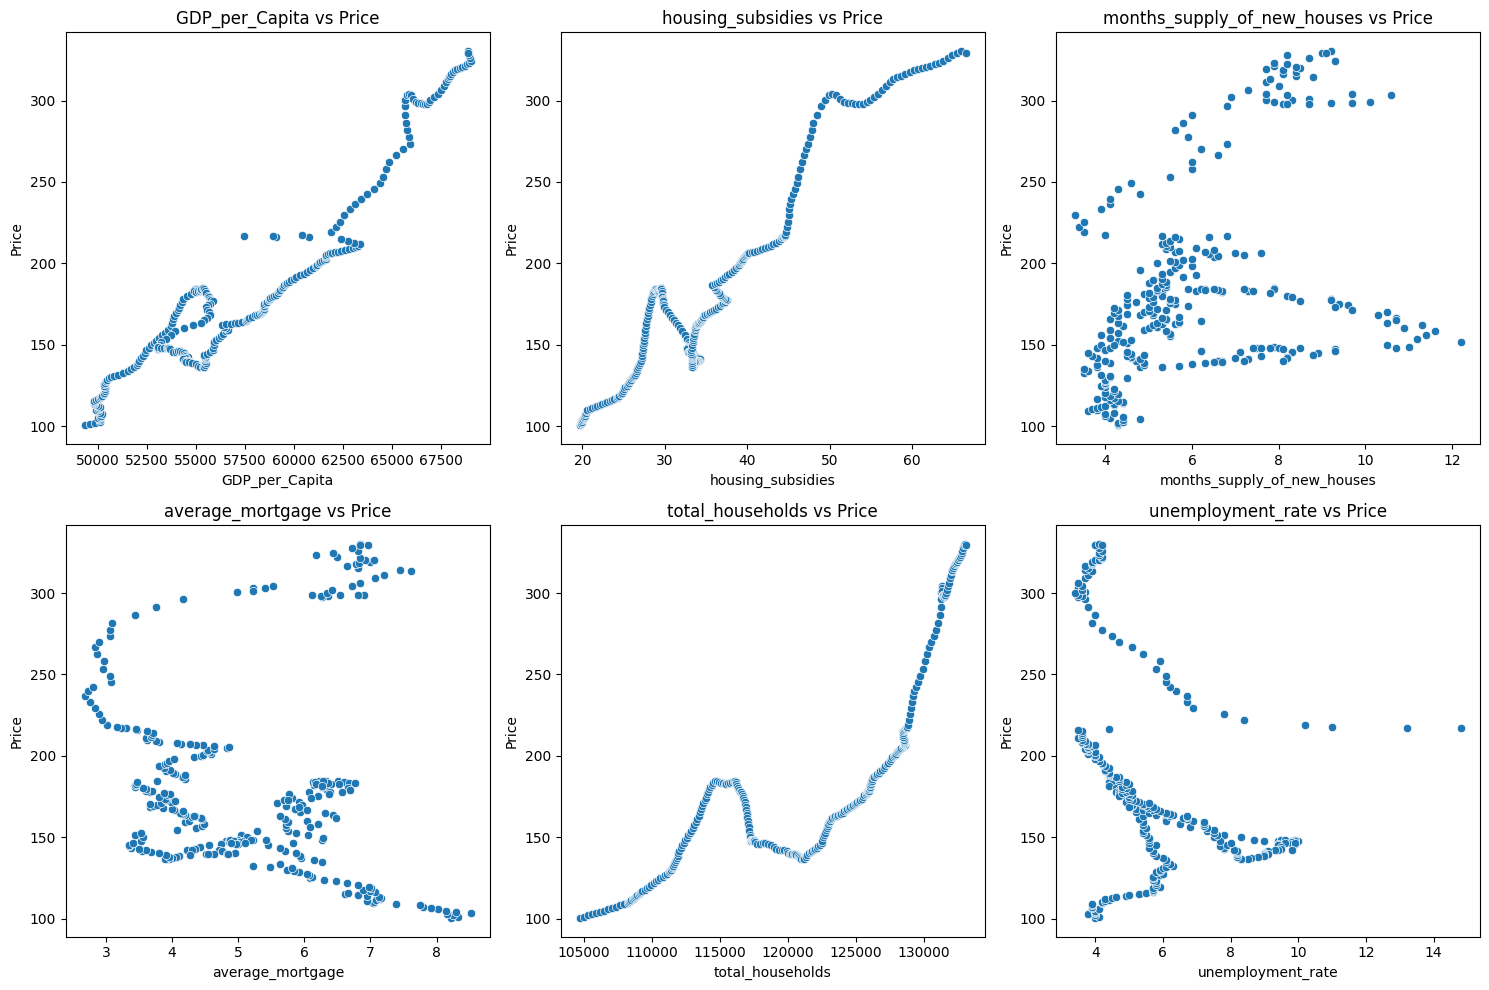

In [813]:
n_features = len(X.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, feature in enumerate(X.columns):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.scatterplot(x=feature, y='price', data=df)
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.title(f'{feature} vs Price')

plt.tight_layout()
plt.show()



1.    As GDP per capita increases, house prices tend to rise.

2.   Higher housing subsidies are associated with higher house prices.

3.    Higher supply shows mixed trends with price variations, potentially due to market saturation effects.

4.   Changes in mortgage rates might influence affordability and pricing in complex ways.

5.    The number of households increases, the demand and house prices rise.

6.    Higher unemployment rates are associated with lower house prices, reflecting economic downturns affecting affordability.

In [814]:
print(X.shape)
print(X.columns)

(303, 6)
Index(['GDP_per_Capita', 'housing_subsidies', 'months_supply_of_new_houses',
       'average_mortgage', 'total_households', 'unemployment_rate'],
      dtype='object')


In [815]:
print(y.shape)

(303,)


###Model Building

In [816]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Multiple Linear Regression

In [817]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [818]:
y_pred = reg_model.predict(X_test)

In [819]:
mse_reg_model = mean_squared_error(y_test, y_pred)
r2_reg_model = r2_score(y_test, y_pred)

In [820]:
print("Multiple Linear Regression Model Metrics:- ")
print(f"Mean Squared Error: {mse_reg_model}")
print(f"R-squared: {r2_reg_model}")

Multiple Linear Regression Model Metrics:- 
Mean Squared Error: 119.91244400842935
R-squared: 0.9650870948051661


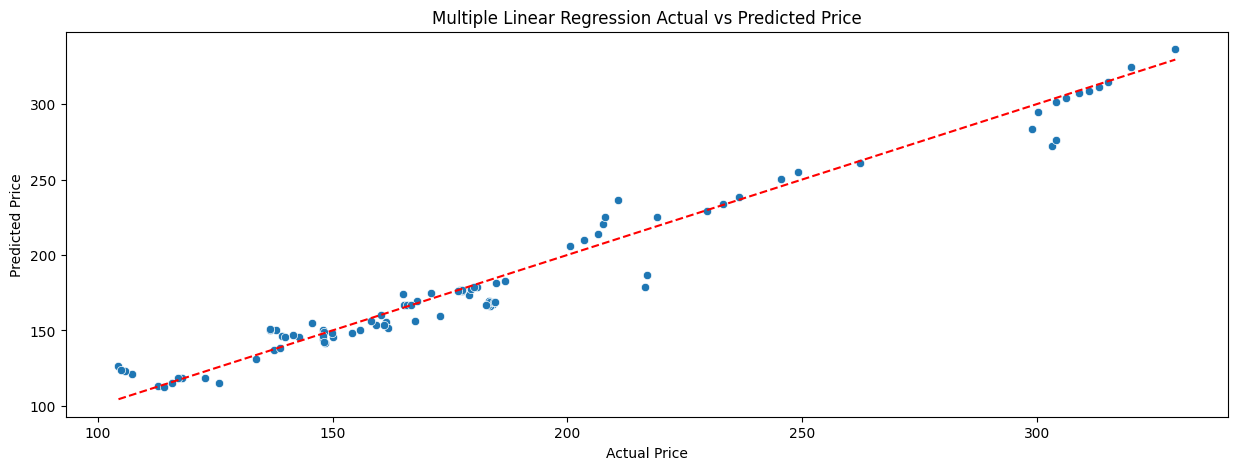

In [821]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression Actual vs Predicted Price')
plt.show()

###RandomForest

In [822]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [823]:
y_pred = rf.predict(X_test)

In [824]:
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

In [825]:
print("RandomForest Model Metrics:- ")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

RandomForest Model Metrics:- 
Mean Squared Error: 3.0429936943560016
R-squared: 0.9991140223082097


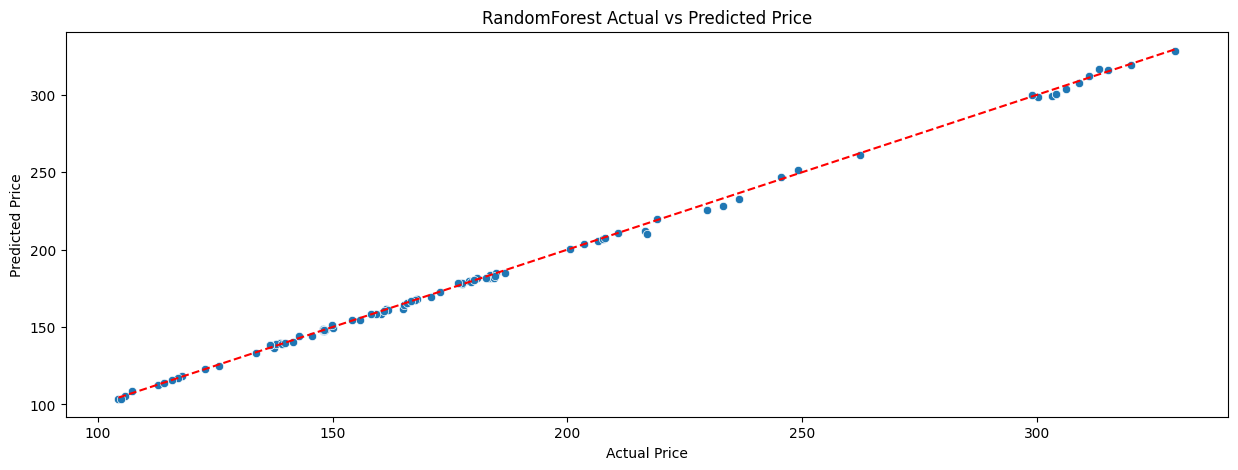

In [826]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('RandomForest Actual vs Predicted Price')
plt.show()

###XGBoost

In [827]:
model = xg.XGBRegressor(n_estimators=100, random_state = 42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [828]:
y_pred = model.predict(X_test)

In [829]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [830]:
print("XGBoost Model Metrics:- ")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

XGBoost Model Metrics:- 
Mean Squared Error: 9.561083312331041
R-squared: 0.9972162589295581


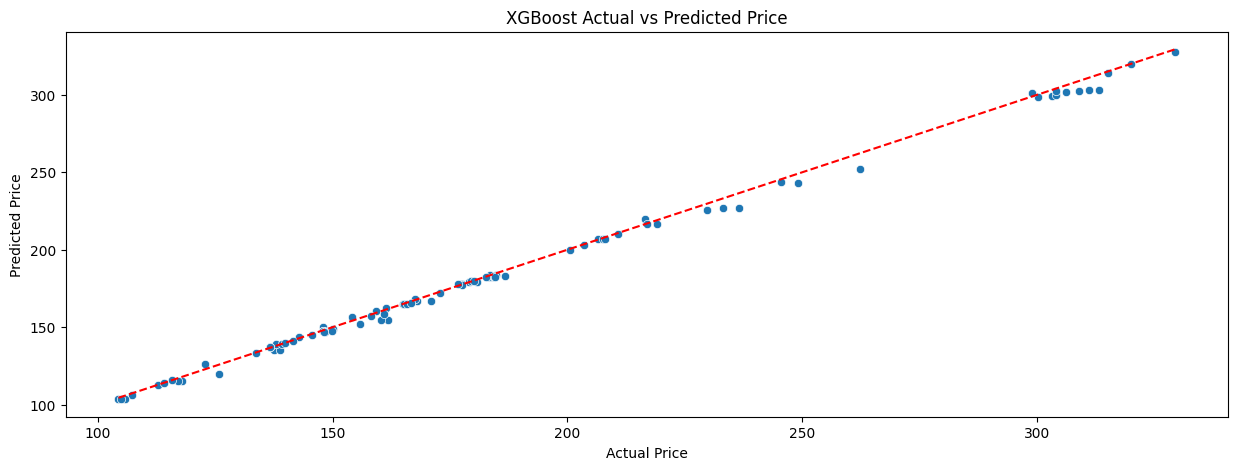

In [831]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Actual vs Predicted Price')
plt.show()

In [832]:
model_table = pd.DataFrame({'Model': ['Multiple_Linear_Regression','Random Forest', 'XGBoost'],
                            'Mean Squared Error': [mse_reg_model, mse_rf, mse],
                            'R-squared': [r2_reg_model, r2_rf, r2]})

In [833]:
print(model_table)

                        Model  Mean Squared Error  R-squared
0  Multiple_Linear_Regression          119.912444   0.965087
1               Random Forest            3.042994   0.999114
2                     XGBoost            9.561083   0.997216


###RandomForest is Working Better

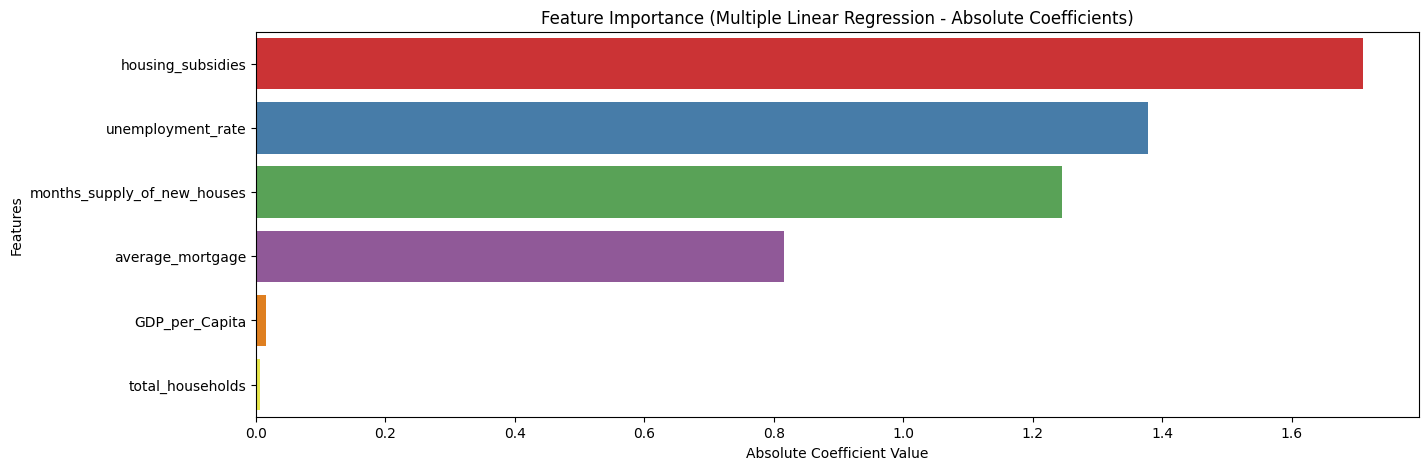

In [834]:
#Feature Importance (using absolute coefficients for Linear Regression)
feature_importances = pd.Series(abs(reg_model.coef_), index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='Set1')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Multiple Linear Regression - Absolute Coefficients)')
plt.show()

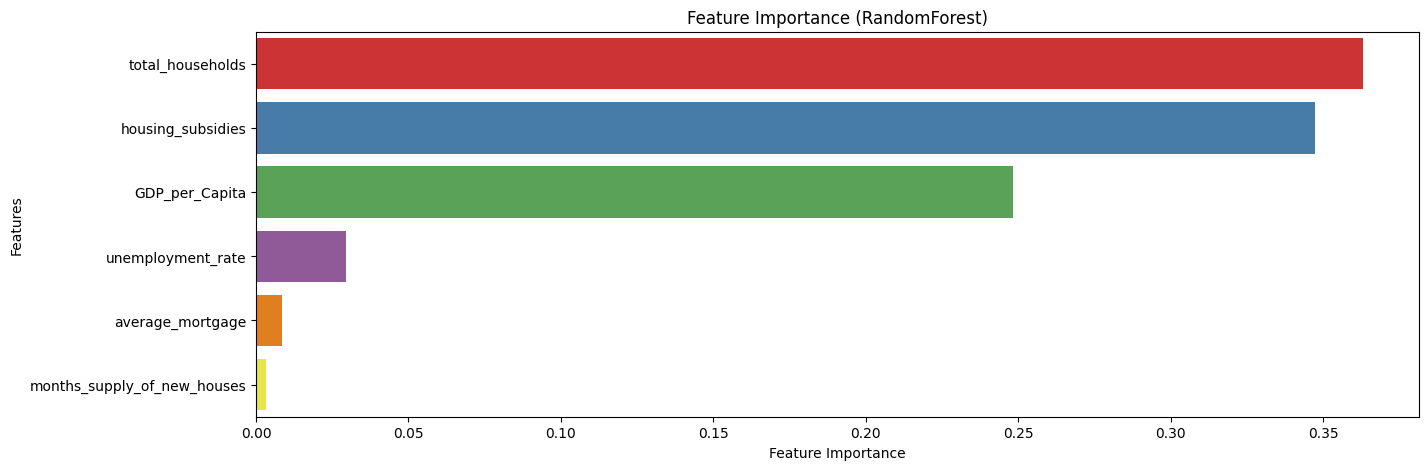

In [835]:
#Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='Set1')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance (RandomForest)')
plt.show()

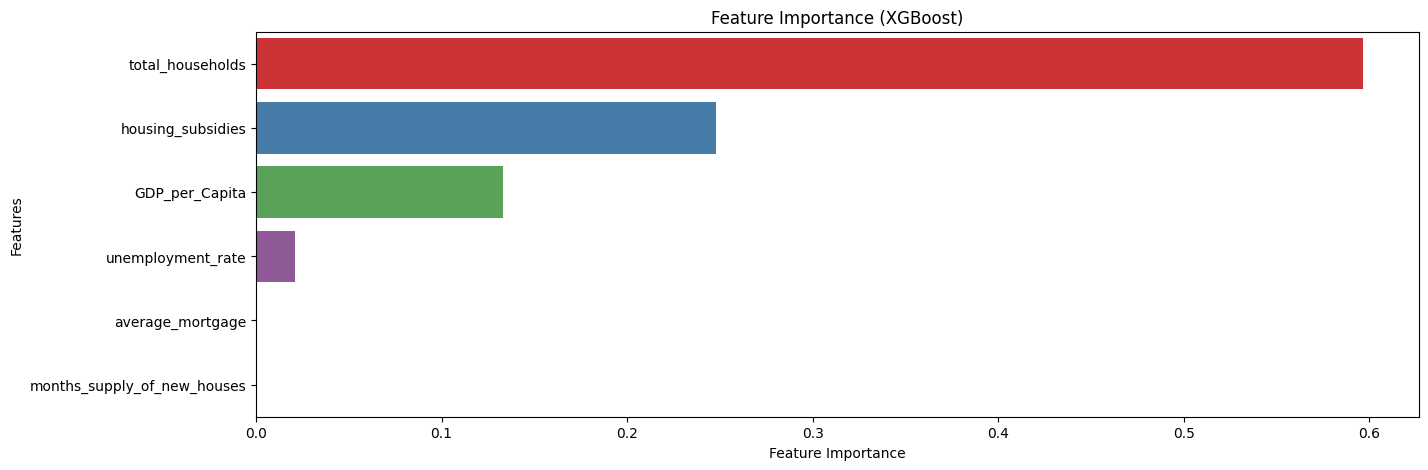

In [836]:
#Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='Set1')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance (XGBoost)')
plt.show()